<a href="https://colab.research.google.com/github/vineeshLee/Artificial-Neural-Networks-TensorFlow-/blob/main/SampleProjectWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Classification with Keras and PyTorch

This project demonstrates how to build, train, and evaluate Convolutional Neural Networks (CNNs) for image classification on the Fashion MNIST dataset using both Keras (TensorFlow) and PyTorch. Additionally, it includes steps for converting the trained Keras model to a TensorFlow Lite (`.tflite`) format for deployment on edge devices.

## Project Overview

The goal of this project is to classify 10 different categories of clothing items from the Fashion MNIST dataset. We implement two separate CNN models, one using the Keras API (backed by TensorFlow) and another using PyTorch. Both models follow a similar architectural pattern involving convolutional layers, batch normalization, max-pooling, and dense layers.

## Dataset

The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is used, consisting of:
- 60,000 training images
- 10,000 test images
- Each image is 28x28 grayscale, representing an item of clothing.
- There are 10 classes, such as T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot.

## Models Implemented

### 1. Keras CNN Model
- **Architecture**: Sequential model with `Conv2D`, `BatchNormalization`, `MaxPooling2D`, `Flatten`, `Dropout`, and `Dense` layers.
- **Training**: Trained for 5 epochs with Adam optimizer and `categorical_crossentropy` loss.
- ****: Model saved in `.h5` format.

### 2. PyTorch CNN Model
- **Architecture**: Custom `nn.Module` with `Conv2d`, `ReLU`, `BatchNorm2d`, `MaxPool2d`, `Flatten`, `Dropout`, and `Linear` layers.
- **Training**: Trained for 5 epochs with Adam optimizer and `CrossEntropyLoss`.
- **Output**: Model state dictionary saved in `.pt` format.

## TensorFlow Lite Conversion

The trained Keras model is converted into a TensorFlow Lite (`.tflite`) format. This format is optimized for mobile and embedded devices, offering reduced model size and lower latency inference.

## Results

Both Keras and PyTorch models achieve high accuracy on the Fashion MNIST test set, demonstrating the effectiveness of CNNs for this image classification task. Training and validation loss/accuracy plots are generated for visual analysis of model performance.

## How to Run

To reproduce the results, execute the code cells in sequential order within a Google Colab environment or a similar Python environment with TensorFlow and PyTorch installed.

### Dependencies
- TensorFlow
- Keras
- PyTorch
- torchvision
- NumPy
- Matplotlib


## Dependencies Explained

Here's a breakdown of the key libraries used in this project:

-   **[TensorFlow](https://www.tensorflow.org/)**: An open-source machine learning framework developed by Google. It's used for building and training machine learning models, particularly deep neural networks. Keras runs on top of TensorFlow in this project.

-   **[Keras](https://keras.io/)**: A high-level neural networks API, written in Python and capable of running on top of TensorFlow. It's designed for fast experimentation with deep neural networks, making it user-friendly for building and training models.

-   **[PyTorch](https://pytorch.org/)**: An open-source machine learning library primarily developed by Facebook's AI Research lab (FAIR). It's widely used for applications such as computer vision and natural language processing, offering dynamic computational graphs and strong GPU acceleration.

-   **[torchvision](https://pytorch.org/vision/stable/index.html)**: A package for PyTorch that consists of popular datasets, model architectures, and common image transformations for computer vision. It simplifies working with image data in PyTorch projects.

-   **[NumPy](https://numpy.org/)**: The fundamental package for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions to operate on these arrays. It's crucial for data manipulation in machine learning.

-   **[Matplotlib](https://matplotlib.org/)**: A comprehensive library for creating static, animated, and interactive visualizations in Python. It's used here for plotting training history (loss and accuracy) to visualize model performance.

# Install All Dependencies







In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import os
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


BATCH_SIZE = 128
EPOCHS = 5
INPUT_SHAPE = (28, 28, 1)
NUM_CLASSES = 10
MODEL_DIR = "/content/drive/MyDrive/sample_data/keras_fashion_mnist_model"
os.makedirs(MODEL_DIR, exist_ok=True)


tf.random.set_seed(42)

TensorFlow version: 2.19.0


# Provide Keras Data set

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Original shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train_cat = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_cat = keras.utils.to_categorical(y_test, NUM_CLASSES)

print("Processed shapes:", x_train.shape, y_train_cat.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Processed shapes: (60000, 28, 28, 1) (60000, 10)


# Create Keras Model

In [ ]:
def build_keras_cnn(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_keras_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

# Train the Model

Epoch 1/5
422/422 - 69s - 163ms/step - accuracy: 0.8192 - loss: 0.5006 - val_accuracy: 0.7303 - val_loss: 0.7522
Epoch 2/5
422/422 - 82s - 193ms/step - accuracy: 0.8800 - loss: 0.3244 - val_accuracy: 0.8800 - val_loss: 0.3156
Epoch 3/5
422/422 - 64s - 153ms/step - accuracy: 0.8937 - loss: 0.2833 - val_accuracy: 0.8947 - val_loss: 0.2825
Epoch 4/5
422/422 - 83s - 197ms/step - accuracy: 0.9035 - loss: 0.2576 - val_accuracy: 0.9050 - val_loss: 0.2571
Epoch 5/5
422/422 - 64s - 151ms/step - accuracy: 0.9115 - loss: 0.2351 - val_accuracy: 0.9082 - val_loss: 0.2477


Keras test loss: 0.2640, test accuracy: 0.9039
Saved Keras model to: /mnt/data/keras_fashion_mnist_model/fashion_mnist_keras_cnn.h5


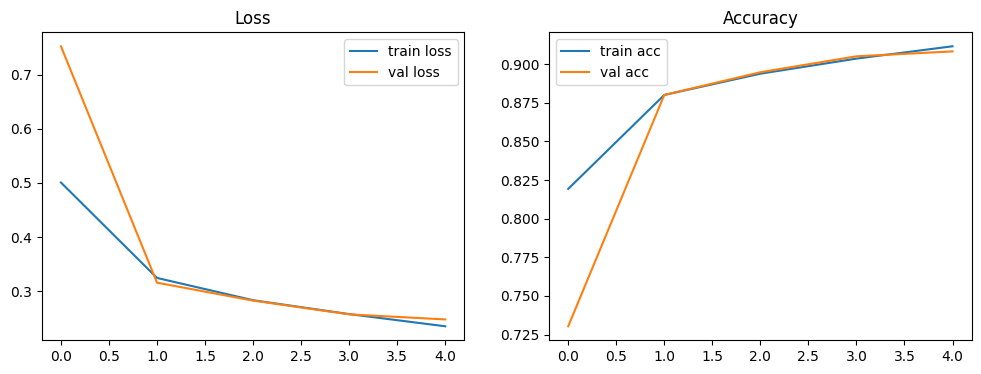

In [ ]:
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2
)

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Keras test loss: {test_loss:.4f}, test accuracy: {test_acc:.4f}")

model_path = os.path.join(MODEL_DIR, "fashion_mnist_keras_cnn.h5")
model.save(model_path)
print("Saved Keras model to:", model_path)


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.title('Accuracy')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
import os
import matplotlib.pyplot as plt

print("PyTorch version:", torch.__version__)

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE_PT = 128
EPOCHS_PT = 5
MODEL_DIR_PT = "/content/drive/MyDrive/sample_data/pytorch_fashion_mnist_model"
os.makedirs(MODEL_DIR_PT, exist_ok=True)

PyTorch version: 2.8.0+cu126


In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = torchvision.datasets.FashionMNIST(root='/mnt/data', train=True, download=True, transform=transform)
test_dataset  = torchvision.datasets.FashionMNIST(root='/mnt/data', train=False, download=True, transform=transform)

val_size = int(0.1 * len(train_dataset))
train_size = len(train_dataset) - val_size
train_ds, val_ds = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE_PT, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE_PT, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE_PT, shuffle=False)

print("Dataset sizes:", len(train_ds), len(val_ds), len(test_dataset))

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 298kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.50MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.48MB/s]

Dataset sizes: 54000 6000 10000


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(64*7*7, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model_pt = SimpleCNN().to(DEVICE)
print(model_pt)

SimpleCNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.4, inplace=False)
    (2): Linear(in_features=3136, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


Epoch 1/5 - train_loss: 0.3770  val_loss: 0.2731  val_acc: 0.8990
Epoch 2/5 - train_loss: 0.2539  val_loss: 0.2352  val_acc: 0.9140
Epoch 3/5 - train_loss: 0.2169  val_loss: 0.2328  val_acc: 0.9093
Epoch 4/5 - train_loss: 0.1919  val_loss: 0.2114  val_acc: 0.9212
Epoch 5/5 - train_loss: 0.1726  val_loss: 0.2139  val_acc: 0.9228
PyTorch test loss: 0.2400, test accuracy: 0.9151
Saved PyTorch model to: /mnt/data/pytorch_fashion_mnist_model/fashion_mnist_pytorch_cnn.pt


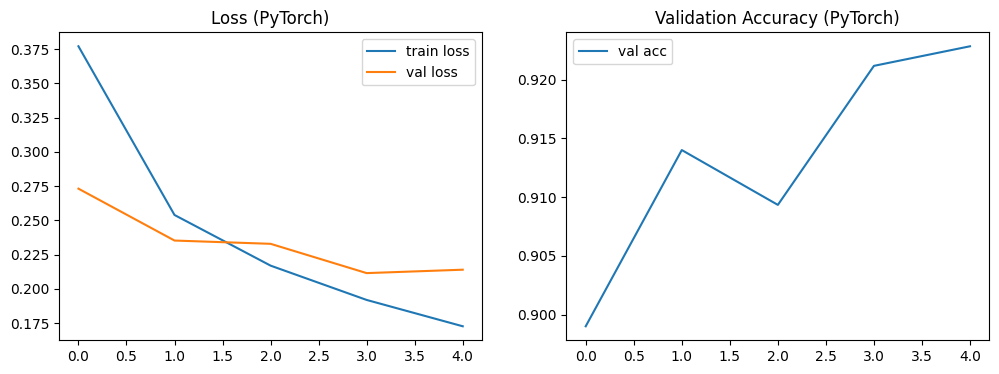

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pt.parameters(), lr=1e-3)

def evaluate(model, loader):
    model.eval()
    total = 0
    correct = 0
    running_loss = 0.0
    with torch.no_grad():
        for xb,yb in loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            outputs = model(xb)
            loss = criterion(outputs, yb)
            running_loss += loss.item() * xb.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += xb.size(0)
    return running_loss/total, correct/total

train_losses, val_losses, val_accs = [], [], []

for epoch in range(1, EPOCHS_PT+1):
    model_pt.train()
    running = 0.0
    for xb,yb in train_loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        outputs = model_pt(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        running += loss.item() * xb.size(0)
    train_loss = running / len(train_loader.dataset)
    val_loss, val_acc = evaluate(model_pt, val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f"Epoch {epoch}/{EPOCHS_PT} - train_loss: {train_loss:.4f}  val_loss: {val_loss:.4f}  val_acc: {val_acc:.4f}")

test_loss_pt, test_acc_pt = evaluate(model_pt, test_loader)
print(f"PyTorch test loss: {test_loss_pt:.4f}, test accuracy: {test_acc_pt:.4f}")

pt_model_path = os.path.join(MODEL_DIR_PT, "fashion_mnist_pytorch_cnn.pt")
torch.save(model_pt.state_dict(), pt_model_path)
print("Saved PyTorch model to:", pt_model_path)


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.legend(); plt.title('Loss (PyTorch)')

plt.subplot(1,2,2)
plt.plot(val_accs, label='val acc')
plt.legend(); plt.title('Validation Accuracy (PyTorch)')
plt.show()

# Convert to a .tfLite Model

In [ ]:
# Load the saved Keras model
model_path = os.path.join(MODEL_DIR, "fashion_mnist_keras_cnn.h5")
keras_model = tf.keras.models.load_model(model_path)

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_path = os.path.join(MODEL_DIR, "fashion_mnist_keras_cnn.tflite")
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print("Saved TensorFlow Lite model to:", tflite_model_path)

Saved artifact at '/tmp/tmp_m8n932s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132658558054096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132658558053712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132658558055824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132658558056976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132658558055248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132658558055056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132658558054864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132658558056208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132658558056592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132658558058128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132658558056016:

## Mount Google Drive

Run this cell to mount your Google Drive and enable saving files directly to it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#convert keras model to .tfLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("output.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ TFLite model saved: output.tflite")

Saved artifact at '/tmp/tmpsa7dozzm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132663390464784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663390465552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663390467472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663390465168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663390464976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663390466512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663390467280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663390466704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663390469584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663390469776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663390468240